In [ ]:
%matplotlib inline

<span style='font-family:Georgia;  font-size: 40px'> Курс "Основы пространственного анализа в Python" </span>   

<div> <p id="header-bg-title"><br> <br></p> </div>


<span style='font-family:Georgia;font-size: 30px;  '> Блок 2. Особенности работы с пространственными данными. Создание гео-объектов</span>  


<div> <p id="header-bg-title"><br> <br></p> </div>




<span style="font-family:Georgia; font-weight: bold; font-size: 14px "> 
    Автор: Инесса Трегубова <br>
    Канал: @datainthecity
</span>

**Когда нужно?**
   1. Есть список координат и нужно добавить их в набор
   2. Геометрия записана с помощью geohash/текста и нужно получать координаты

<span style="color:red; font-family:Georgia; font-weight: bold; "> ДЗ: в этом ноутбуке 4 домашних задания: </span>

- [Задание 1](#task1)
- [Задание 2](#task2)
- [Задание 3](#task3)
- [Задание 4](#task4)

## Оглавление:
   
1. [Библиотека  shapely](#shapely)
       
2. [Точка](#point)
       
3. [Полигон](#polygon)
       
4. [Линия](#line)
       
5. [Функция принадлежности](#within)         
       

<a id="shapely"> </a>
## <span style='font-family:Georgia;background-color:yellow;'> Библиотека shapely </span>

Все геометрические фигуры в Python - это объекты библиотеки **Shapely**. Ниже показано как из разных записей геометрии получить объект shapely

Для работы с 3 типами объектов:
- точки
- кривые
- поверхности

Документация: https://shapely.readthedocs.io/en/stable/manual.html

<a id="point"> </a>
## <span style='font-family:Georgia;background-color:yellow;'> Точка - shapely.geometry.Point  </span>

In [1]:
from shapely.geometry import Point

<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 1. Создание из координат</span >

In [2]:
pin_tour_eiffel = Point([48.860904, 2.294551])

<span style='font-family:Georgia'> Проверяем тип объекта </span>

In [3]:
print('Тип объекта:', type(pin_tour_eiffel))

Тип объекта: <class 'shapely.geometry.point.Point'>


<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 2. Создание из словаря</span>

In [4]:
pin_tour_eiffel_geojson = {"type": "Point", "coordinates": [48.860904,2.294551]}

In [6]:
print("Текущий тип объекта: {}".format(type(pin_tour_eiffel_geojson)))

Текущий тип объекта: <class 'dict'>


In [7]:
from shapely.geometry import shape

In [8]:
pin_tour_eiffel1 = shape(pin_tour_eiffel_geojson)

In [9]:
print("Тип объекта:", type(pin_tour_eiffel1))

Тип объекта: <class 'shapely.geometry.point.Point'>


<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 3. Создание из строки (WKT - Well-known text)</span>

In [10]:
from shapely import wkt

In [11]:
pin_tour_eiffel_str = "POINT (48.860904 2.294551)"
pin_tour_eiffel2 = wkt.loads(pin_tour_eiffel_str)

In [12]:
print("Тип объекта:", pin_tour_eiffel2.geom_type)

Тип объекта: Point


In [13]:
print(
    "Является ли объект pin_tour_eiffel2 точкой? Ответ: {}".format(
        pin_tour_eiffel2.geom_type == "Point"
    )
)

Является ли объект pin_tour_eiffel2 точкой? Ответ: True


In [16]:
#И обратно: dumps, str
print('Переводим обратно в строку:')
# ниже допишите из лекции
pin_tour_eiffel2_str = wkt.dumps(pin_tour_eiffel2)
print(pin_tour_eiffel2_str)
print(type(pin_tour_eiffel2_str) == str)


Переводим обратно в строку:
POINT (48.8609039999999979 2.2945509999999998)
True


 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'>4. Создание из геохеша</span >

In [17]:
geohash = "u09tujt1pnysxyzr"

In [18]:
import pygeohash as gh

1. Декодируем

In [19]:
decoded_geohash = gh.decode(geohash)

2. Выводим тип

In [20]:
print(
    "decoded_geohash: {}, Тип объекта:{}".format(decoded_geohash, type(decoded_geohash))
)

decoded_geohash: LatLong(latitude=48.85366325200266, longitude=2.292332164124673), Тип объекта:<class 'pygeohash.geohash_types.LatLong'>


3. Конвертируем в Point

In [27]:
point_from_geohash = Point(decoded_geohash)

In [22]:
print("Тип объекта:", type(point_from_geohash))

Тип объекта: <class 'shapely.geometry.point.Point'>


In [24]:
print("Координаты: {}, {}".format(point_from_geohash.x, point_from_geohash.y))

Координаты: 48.85366325200266, 2.292332164124673


4. Сделаем проверку, переконвертировав точки обратно в геохеш

In [32]:
new_geohash = gh.encode(point_from_geohash.x, point_from_geohash.y)
new_geohash

'u09tujt1pnys'

In [30]:
is_equal = new_geohash == geohash
print("geohash равен кодированным в геохеш координатам? Ответ: {}".format({is_equal}))

geohash равен кодированным в геохеш координатам? Ответ: {False}


In [31]:
print(len(geohash), len(new_geohash))

16 12


In [34]:
precision = 16

In [35]:
# точность геохеша = длина строки

print("Длина исходного геохеша: {}".format(precision))

Длина исходного геохеша: 16


In [42]:
new_geohash = gh.encode(point_from_geohash.x, point_from_geohash.y, precision=16)
new_geohash

ValueError: Precision must be between 1 and 12, but got 16.

In [40]:
is_equal = new_geohash == geohash
print("geohash равен кодированным в геохеш координатам ? Ответ:{}".format({is_equal}))

geohash равен кодированным в геохеш координатам ? Ответ:{False}


In [ ]:
print(new_geohash, geohash)

<a id="polygon"> </a>
## <span style='font-family:Georgia;background-color:yellow;'>Полигон - shapely.geometry.Polygon </span>

In [43]:
from shapely.geometry import Polygon

 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 1. Создание из списка координат</span >

In [44]:
pointList = [
    [48.85991, 2.29440],
    [48.86539, 2.29440],
    [48.86539, 2.29640],
    [48.85991, 2.29640],
]

poly_tour_eiffel = Polygon(pointList)

In [45]:
print("Тип объекта:", type(poly_tour_eiffel))

Тип объекта: <class 'shapely.geometry.polygon.Polygon'>


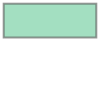

In [46]:
poly_tour_eiffel

<a id="task1"> </a>
<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 1 </span>    
<span style=" font-family:Georgia; font-weight: bold; ">Проверьте, получится ли создать полигон, если передавать координаты как тип tuple, а не list

In [47]:
pointList2 = [
    (48.85991, 2.29440),
    (48.86539, 2.29440),
    (48.86539, 2.29640),
    (48.85991, 2.29640),
]

In [48]:
poly_tour_eiffel2 = Polygon(pointList2)

<class 'shapely.geometry.polygon.Polygon'>


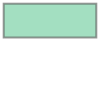

In [49]:
print(type(poly_tour_eiffel2))
poly_tour_eiffel2

 <span style=" font-family:Georgia; font-weight: bold; "> Выведите обратно список координат с помощью кода ниже. Совпадает ли количество? </span>

In [50]:
print("Список координат:{}".format(list(zip(*poly_tour_eiffel2.exterior.coords.xy))))

Список координат:[(48.85991, 2.2944), (48.86539, 2.2944), (48.86539, 2.2964), (48.85991, 2.2964), (48.85991, 2.2944)]


In [51]:
print(
    "Длина исходного списка координат: {}, длина списка координат объекта: {}".format(
        len(pointList2),
        len(list(zip(*poly_tour_eiffel.exterior.coords.xy)))
    )
)

Длина исходного списка координат: 4, длина списка координат объекта: 5


<span style=" font-family:Georgia">**Что изменилось между pointList2 и координатами poly_tour_eiffel2 ? Ответ запишите в тесте**</span>


<span style=" font-family:Georgia">**Какой тип геометрии имеет объект *poly_tour_eiffel2*? Выведите тип 2-мя способами**</span>

In [56]:
print(poly_tour_eiffel2.geom_type)
print(poly_tour_eiffel2)

Polygon
POLYGON ((48.85991 2.2944, 48.86539 2.2944, 48.86539 2.2964, 48.85991 2.2964, 48.85991 2.2944))


<span style="color:red; font-family:Georgia; font-weight: bold; ">Конец задания 1</span>

 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'>2. Создание из словаря</span>

In [57]:
poly_tour_eiffel_geojson = {
    "type": "Polygon",
    "coordinates": [
        [
    [48.85991, 2.29440],
    [48.86539, 2.29440],
    [48.86539, 2.29640],
    [48.85991, 2.29640],
        ]
    ],
}

In [58]:
print("Тип объекта:", type(poly_tour_eiffel_geojson))

Тип объекта: <class 'dict'>


In [59]:
print("Тип объекта:", type(shape(poly_tour_eiffel_geojson)))


Тип объекта: <class 'shapely.geometry.polygon.Polygon'>


<a id="task2"> </a>


<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 2 </span>    
<span style=" font-family:Georgia; font-weight: bold; ">Создайте из словаря объект полигон. Убедитесь, что полученный тип это geometry.Polygon  </span>

In [61]:
# ваш код
poly_tour_eiffel4 = shape(poly_tour_eiffel_geojson)

In [62]:
print('Тип объекта:', type(poly_tour_eiffel4))

Тип объекта: <class 'shapely.geometry.polygon.Polygon'>


<span style="color:red; font-family:Georgia; font-weight: bold; ">Конец задания 2 </span>

 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'>3. Создание из строки (WKT - Well-known text)</span>

In [64]:
poly_tour_eiffel_str = 'POLYGON ((15.0512620 37.463320, 15.0512620 37.4743620, 15.0732421 37.4743652, 15.0732421 37.463379, 15.0512696 37.463379, 15.0512620 37.463320))'

poly_tour_eiffel3 = wkt.loads(poly_tour_eiffel_str)

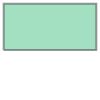

In [65]:
poly_tour_eiffel3

In [66]:
print("Тип объекта:", type(poly_tour_eiffel3))

Тип объекта: <class 'shapely.geometry.polygon.Polygon'>


 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'>4. Создание из бинарного* кода (WKB - Well-known binary)</span>

Формат wkb часто используют для хранения геометрии в базе данных. Например, это стандартный формат для Postgis

In [67]:
poly_tour_eiffel_wkb = "0103000020E610000001000000060000001B0E4B033F1A2E4097CADB114EBB42401B0E4B033F1A2E408A3BDEE4B7BC4240776110FD7F252E40252EB6FFB7BC4240776110FD7F252E409C53C90050BB4240D98E4E02401A2E409C53C90050BB42401B0E4B033F1A2E4097CADB114EBB4240"

In [68]:
from shapely import wkb

<p>
Для декодирования используем объект wkb библиотеки shapely.<br>
Проверьте ваш код hexidecimal или binary?:
hexidecimal -> hex=True, binary -> hex = False
    </p>

In [69]:
poly_tour_eiffel4 = wkb.loads(poly_tour_eiffel_wkb, hex=True)

In [70]:
print("Тип объекта:", type(poly_tour_eiffel4))

Тип объекта: <class 'shapely.geometry.polygon.Polygon'>


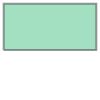

In [71]:
poly_tour_eiffel4

<a id="line"> </a>

## <span style='font-family:Georgia;background-color:yellow;'> Линия - shapely.geometry.LineString </span>
<br>


<a id="task3"> </a>
<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 3 </span>  
<span style=" font-family:Georgia; font-weight: bold; "> Повторите 4 способа создания объекта shapely для линии. Для этого сначала создайте объект, указанного типа и затем сконвертируйте его в shapely.linestring, используя подходящую функцию  </span>

In [ ]:
from shapely.geometry import LineString

<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 1.Создание из списка координат</span >

In [ ]:
pointsList = [[45.75529, 4.91956], [45.83675, 4.84574]]
line = 

<span style='font-family:Georgia'> Проверьте тип объекта </span>

In [ ]:
print(
    "Тип объекта:",
)

<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 2. Создание из словаря</span>

In [ ]:
line_geojson = {}

In [ ]:
line = 

<span style='font-family:Georgia'> Проверьте тип объекта </span>

In [ ]:
print(
    "Тип объекта:",
)

<span style='font-family:Georgia;  font-weight: bold; font-size:16px'> 3. Создание из строки (WKT - Well-known text)</span>

In [ ]:
line_wkt = "LINESTRING (45.75529 4.91956, 45.83675 4.84574)"

In [ ]:
line = wkt.loads(line_wkt)

<span style='font-family:Georgia'> Проверьте тип объекта </span>

In [ ]:
print(
    "Тип объекта:",
)

 <span style='font-family:Georgia;  font-weight: bold; font-size:16px'>4. Создание из бинарного кода (WKB - Well-known binary)</span>

In [ ]:
line_wkb = wkb.dumps(line, hex=True)

In [ ]:
line = 

<span style='font-family:Georgia'> Проверьте тип объекта </span>

In [ ]:
print(
    "Тип объекта:",
)

<span style="color:red; font-family:Georgia; font-weight: bold; ">Конец задания 3 </span>

<a id="within"> </a>
## <span style='font-family:Georgia;background-color:yellow;'> Функции геометрических объектов: принадлежит ли точка полигону? </span>

 <span style='font-family:Georgia;'>Для проверки принадлежности используют функцию **within**. Формат записи: {кто}.within({кому принадлежит})</span>

In [ ]:
print(
    "Принадлежит ли pin_tour_eiffel poly_tour_eiffel? Ответ:{}".format(
        pin_tour_eiffel.within(poly_tour_eiffel)
    )
)

<a id="task4"> </a>
<span style="color:red; font-family:Georgia; font-weight: bold; ">Домашнее задание 4 </span>     
<span style=" font-family:Georgia; font-weight: bold; "> Соедините точку и полигон, которому она принадлежит  из словарей ниже. Напишите код проверки ниже. Ответ запишите текстом в ячейке </span>

In [72]:
list_of_points = {
    "p0": "POINT (37.5816584011005 55.7768404541467)",
    "p1": [37.6563762027765, 55.77352184893971],
    "p2": "01010000000022B41DF9D042404CD4E54A73E54B40",
    "p3": "tnxwjpr3gu85",
}
list_of_polys = {
    "poly0": "0103000000010000000500000080C3866907D442409B9AB57CFFE24B4080C3866907D4424063556E0A06E34B40B808CEDB00D4424063556E0A06E34B40B808CEDB00D442409B9AB57CFFE24B4080C3866907D442409B9AB57CFFE24B40",
    "poly1": [
        (37.6574380229531, 55.776618916674096),
        (37.6574380229531, 55.7768189166741),
        (37.657238022953095, 55.7768189166741),
        (37.657238022953095, 55.776618916674096),
        (37.6574380229531, 55.776618916674096),
    ],
    "poly2": "POLYGON ((37.5817584011005010 55.7767404541466973, 37.5817584011005010 55.7769404541467040, 37.5815584011004944 55.7769404541467040, 37.5815584011004944 55.7767404541466973, 37.5817584011005010 55.7767404541466973))",
    "poly3": {
        "type": "Polygon",
        "coordinates": [
            [
                (37.6327024179034, 55.7924809499944),
                (37.6327024179034, 55.792680949994406),
                (37.632502417903396, 55.792680949994406),
                (37.632502417903396, 55.7924809499944),
                (37.6327024179034, 55.7924809499944),
            ]
        ],
        "properties": {},
    },
}

In [85]:
#convert points to shapely objects
geo_points = {}
for point_name in list_of_points:
    point = list_of_points[point_name]

    if isinstance(point, list):
        geo_point = Point(point)
    elif isinstance(point, str) and point.startswith('0101000000'):
        geo_point = wkb.loads(point, hex=True)
    elif isinstance(point, str) and point.startswith('POINT'):
        geo_point = wkt.loads(point)
    else:
        geo_point = Point(gh.decode(point))


    assert isinstance(geo_point, Point)

    geo_points[point_name] = geo_point

print(geo_points)

#convert polys to shapely objects

geo_polys = {}
for poly_name in list_of_polys:
    poly = list_of_polys[poly_name]
    if isinstance(poly, str) and poly.startswith('POLYGON'):
        geo_poly = wkt.loads(poly)
    elif isinstance(poly, str) and poly.startswith('0103000000'):
        geo_poly = wkb.loads(poly, hex=True)
    elif isinstance(poly, list):
        geo_poly = Polygon(poly)
    elif isinstance(poly, dict):
        geo_poly = shape(poly)
    
    assert isinstance(geo_poly, Polygon)
    geo_polys[poly_name] = geo_poly

print(geo_polys)



{'p0': <POINT (37.582 55.777)>, 'p1': <POINT (37.656 55.774)>, 'p2': <POINT (37.633 55.793)>, 'p3': <POINT (37.657 55.777)>}
{'poly0': <POLYGON ((37.656 55.773, 37.656 55.774, 37.656 55.774, 37.656 55.773, 37.65...>, 'poly1': <POLYGON ((37.657 55.777, 37.657 55.777, 37.657 55.777, 37.657 55.777, 37.65...>, 'poly2': <POLYGON ((37.582 55.777, 37.582 55.777, 37.582 55.777, 37.582 55.777, 37.58...>, 'poly3': <POLYGON ((37.633 55.792, 37.633 55.793, 37.633 55.793, 37.633 55.792, 37.63...>}


<span style=" font-family:Georgia; font-weight: bold; "> Конвертеруйте значения в объекты shapely, выбирая нужные функции в зависимости от формата прежде, чем проверять принадлежность</span>

In [87]:
for point_name in geo_points:
    point = geo_points[point_name]
    for poly_name in geo_polys:
        poly = geo_polys[poly_name]
        if point.within(poly):
            print("{} is within {}".format(point_name, poly_name))


p0 is within poly2
p1 is within poly0
p2 is within poly3
p3 is within poly1


<span style=" font-family:Georgia; font-weight: bold; "> Проверки</span>

In [ ]:
print('Для p0: poly0-{},poly1-{},poly2-{},poly3-{} '.format( p0.within(poly0)#допишите)
# допишите по аналогии для остальных точек

**Получившийся результат впишите в практическом тесте**


<span style="color:red; font-family:Georgia; font-weight: bold; ">Конец задания 4 </span>